**Projeto: Hipóteses - Spotify (Laboratoria) - Ana Guimarães e Débora Vasconcellos**

##DataFrame

In [3]:
import pandas as pd

# Carregar o DataFrame
df = pd.read_csv('/content/full_table_spotify_v1.csv')

In [4]:
# Informações gerais sobre o DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   track_id                       948 non-null    object
 1   track_name                     948 non-null    object
 2   artist_s__name                 948 non-null    object
 3   artist_count                   948 non-null    int64 
 4   released_year                  948 non-null    int64 
 5   released_month                 948 non-null    int64 
 6   released_day                   948 non-null    int64 
 7   release_date_concat            948 non-null    object
 8   release_year_month_concat      948 non-null    object
 9   total_playlists                948 non-null    int64 
 10  in_spotify_playlists           948 non-null    int64 
 11  in_spotify_charts              948 non-null    int64 
 12  streams                        948 non-null    int64 
 13  in_ap

In [ ]:
#mais colunas
pd.set_option('display.max_columns', 41)
df.head(950)

,track_id,track_name,artist_s__name,artist_count,released_year,released_month,released_day,release_date_concat,release_year_month_concat,total_playlists,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,bpm,danceability__,valence__,energy__,acousticness__,instrumentalness__,liveness__,speechiness__,bpm_quartil,bpm_categorizada,danceability_quartil,danceability_categorizada,valence_quartil,valence_categorizada,energy_quartil,energy_categorizada,acousticness_quartil,acousticness_categorizada,instrumentalness_quartil,instrumentalness_categorizada,liveness_quartil,liveness_categorizada,speechiness_quartil,speechiness_categorizada
0,6909746,white christmas,bing crosby john scott trotter his orchestra k...,3,1942,1,1,1942-01-01,1942-01,12136,11940,0,395591396,73,79,123,0,96,23,19,25,91,0,40,3,1,Baixo,1,Baixo,1,Baixo,1,Baixo,4,Alto,3,Baixo,4,Alto,1,Baixo
1,4002890,a holly jolly christmas single version,burl ives,1,1952,1,1,1952-01-01,1952-01,8111,7930,0,395591396,108,120,73,0,140,67,81,36,64,0,15,3,3,Baixo,2,Baixo,4,Alto,1,Baixo,4,Alto,1,Baixo,3,Baixo,1,Baixo
2,6372609,jingle bell rock,bobby helms,1,1957,1,1,1957-01-01,1957-01,10595,10326,0,741301563,165,99,104,0,119,74,78,37,84,0,6,3,2,Baixo,3,Baixo,4,Alto,1,Baixo,4,Alto,1,Baixo,1,Baixo,1,Baixo
3,8167749,deck the hall remastered 1999,nat king cole,1,1959,1,1,1959-01-01,1959-01,3405,3299,0,127027715,65,39,41,0,107,69,96,36,81,0,8,4,2,Baixo,2,Baixo,4,Alto,1,Baixo,4,Alto,4,Alto,1,Baixo,1,Baixo
4,5350503,it s the most wonderful time of the year,andy williams,1,1963,10,14,1963-10-14,1963-10,9221,8879,0,663832097,182,107,160,0,202,24,76,60,77,0,12,4,4,Alto,1,Baixo,4,Alto,2,Baixo,4,Alto,3,Baixo,3,Baixo,1,Baixo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,8346639,hummingbird metro boomin james blake,james blake metro boomin,2,2023,6,2,2023-06-02,2023-06,283,277,1,39666245,1,20,5,0,81,59,26,60,46,1,25,13,1,Baixo,2,Baixo,1,Baixo,2,Baixo,4,Alto,4,Alto,4,Alto,4,Alto
944,5554493,danger spider offset jid,offset jid,2,2023,6,2,2023-06-02,2023-06,223,214,0,24975653,3,3,6,0,143,83,25,69,4,0,23,12,4,Alto,4,Alto,1,Baixo,3,Baixo,1,Baixo,4,Alto,3,Baixo,4,Alto
945,4866757,all the way live spider man across the spider ...,future lil uzi vert metro boomin,3,2023,6,2,2023-06-02,2023-06,269,259,0,37126685,5,17,5,0,135,77,28,55,18,0,22,15,3,Baixo,3,Baixo,1,Baixo,2,Baixo,3,Baixo,4,Alto,3,Baixo,4,Alto
946,5168392,barbie world with aqua from barbie the album,nicki minaj aqua ice spice,3,2023,6,23,2023-06-23,2023-06,1264,1117,80,65156199,82,145,65,16,144,77,75,58,52,0,23,25,4,Alto,3,Baixo,4,Alto,2,Baixo,4,Alto,3,Baixo,3,Baixo,4,Alto


In [ ]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [ ]:
import pandas as pd

# Configurações para aumentar o limite de exibição de colunas e linhas
pd.set_option('display.max_columns', None)  # Mostra todas as colunas
pd.set_option('display.max_rows', None)     # Mostra todas as linhas
pd.set_option('display.width', 1000)        # Aumenta a largura para evitar quebra de linha nas colunas

##Correlações

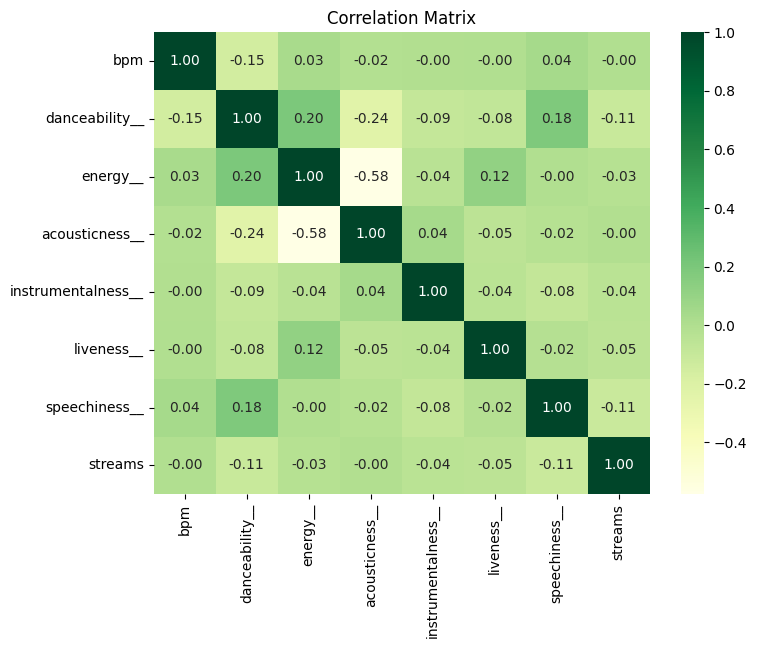

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculando correlações
# correlação entre as características e streams:
correlation_matrix = df[['bpm' , 'danceability__', 'energy__', 'acousticness__' , 'instrumentalness__' , 'liveness__' ,'speechiness__','streams']].corr()

# Plotando heatmap de correlações
plt.figure(figsize=(8, 6))
# Usando a colormap 'YlGn'
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='YlGn')
plt.title('Correlation Matrix')
plt.show()


Este coeficiente mede a força e a direção da relação linear entre as variáveis contínuas.

##Teste de Mann-Whitney

In [ ]:
#mannwhitneyu  CADE O GUARDA COSTAS?
#comparar as distribuições de duas amostras independentes (variáveis ordinais)
#bpm_categorizada-> alto/baixo

from scipy.stats import mannwhitneyu

estatisticas, valor_p = mannwhitneyu (df['danceability__'], df['streams'])

print("O valor de p é:", valor_p)

O valor de p é: 0.0


In [ ]:
#bpm_categorizada
# Separe os dados em grupos 'Alto' e 'Baixo'
alta_group = df[df['bpm_categorizada'] == 'Alto']['streams']
baixa_group = df[df['bpm_categorizada'] == 'Baixo']['streams']

# Execute o teste de Mann-Whitney U
estatistica, p_value = mannwhitneyu(alta_group, baixa_group, alternative='two-sided')

# Imprima os resultados
print(f"Mann-Whitney U statistic: {estatistica:.4f}")
print(f"P-value: {p_value:.4f}")

# Verifique se o p-value é significativo (menor que 0.05)
if p_value < 0.05:
    print("Rejeite a hipótese nula: Há uma diferença significativa entre os grupos.")
else:
    print("Não rejeite a hipótese nula: Não há diferença significativa entre os grupos.")

Mann-Whitney U statistic: 87288.0000
P-value: 0.4059
Não rejeite a hipótese nula: Não há diferença significativa entre os grupos.


In [ ]:
#danceability_categorizada
# Separe os dados em grupos 'Alto' e 'Baixo'
alta_group = df[df['danceability_categorizada'] == 'Alto']['streams']
baixa_group = df[df['danceability_categorizada'] == 'Baixo']['streams']

# Execute o teste de Mann-Whitney U
estatistica, p_value = mannwhitneyu(alta_group, baixa_group, alternative='two-sided')

# Imprima os resultados
print(f"Mann-Whitney U statistic: {estatistica:.4f}")
print(f"P-value: {p_value:.4f}")

# Verifique se o p-value é significativo (< 0.05)
if p_value < 0.05:
    print("Rejeite a hipótese nula: Há uma diferença significativa entre os grupos.")
else:
    print("Não rejeite a hipótese nula: Não há diferença significativa entre os grupos.")

Mann-Whitney U statistic: 76918.0000
P-value: 0.0445
Rejeite a hipótese nula: Há uma diferença significativa entre os grupos.


Como o valor-p (0.0445) é menor que um nível de significância comum, 0.05, pode-se concluir que há evidências estatísticas suficientes para rejeitar a hipótese nula.
**Portanto, há diferenças estatisticamente significativas nas contagens de streams entre as duas categorias de danceability (alta e baixa).**

In [ ]:
#energy_categorizada
#Separe os dados em grupos 'Alto' e 'Baixo'

group_alto = df[df["energy_categorizada"] == "Alto"]["streams"]
group_baixo = df[df["energy_categorizada"] == "Baixo"]["streams"]

#Execute o teste de Mann-Whitney U
estatistica, p_value = mannwhitneyu(group_alto, group_baixo, alternative="two-sided")

#Imprima os resultados
print(f"Mann-Whitney U statistic: {estatistica:.4f}")
print(f"P-value: {p_value:.4f}")

#Verifique se o p-value é significativo

if p_value < 0.05:
    print("Rejeite a hipótese nula: Há uma diferença significativa entre os grupos.")
else:
    print("Não rejeite a hipótese nula: Não há diferença significativa entre os grupos.")

Mann-Whitney U statistic: 81098.0000
P-value: 0.3874
Não rejeite a hipótese nula: Não há diferença significativa entre os grupos.


In [ ]:
#acousticness_categorizada
group_alto = df[df["acousticness_categorizada"] == "Alto"]["streams"]
group_baixo = df[df["acousticness_categorizada"] == "Baixo"]["streams"]

#Execute o teste de Mann-Whitney U
estatistica, p_value = mannwhitneyu(group_alto, group_baixo, alternative="two-sided")

#Imprima os resultados
print(f"Mann-Whitney U statistic: {estatistica:.4f}")
print(f"P-value: {p_value:.4f}")

#Verifique se o p-value é significativo

if p_value < 0.05:
    print("Rejeite a hipótese nula: Há uma diferença significativa entre os grupos.")
else:
    print("Não rejeite a hipótese nula: Não há diferença significativa entre os grupos.")

Mann-Whitney U statistic: 82586.0000
P-value: 0.6479
Não rejeite a hipótese nula: Não há diferença significativa entre os grupos.


###Colunas

In [ ]:
print(df.columns)

Index(['track_id', 'track_name', 'artist_s__name', 'artist_count', 'released_year', 'released_month', 'released_day', 'release_date_concat', 'release_year_month_concat', 'total_playlists', 'in_spotify_playlists', 'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'bpm', 'danceability__', 'valence__', 'energy__', 'acousticness__', 'instrumentalness__', 'liveness__', 'speechiness__', 'bpm_quartil', 'bpm_categorizada', 'danceability_quartil', 'danceability_categorizada', 'valence_quartil', 'valence_categorizada', 'energy_quartil', 'energy_categorizada', 'acousticness_quartil', 'acousticness_categorizada', 'instrumentalness_quartil', 'instrumentalness_categorizada', 'liveness_quartil', 'liveness_categorizada', 'speechiness_quartil', 'speechiness_categorizada', 'streams_in_millions'], dtype='object')


Testando se há diferença nos streams entre músicas com alta dançabilidade (danceability ≥ 0.8) e baixa dançabilidade (danceability < 0.8).
Teste t para amostras independentes

In [ ]:
#speechiness_categorizada
group_alto = df[df["speechiness_categorizada"] == "Alto"]["streams"]
group_baixo = df[df["speechiness_categorizada"] == "Baixo"]["streams"]

#Execute o teste de Mann-Whitney U
estatistica, p_value = mannwhitneyu(group_alto, group_baixo, alternative="two-sided")

#Imprima os resultados
print(f"Mann-Whitney U statistic: {estatistica:.4f}")
print(f"P-value: {p_value:.4f}")

#Verifique se o p-value é significativo

if p_value < 0.05:
    print("Rejeite a hipótese nula: Há uma diferença significativa entre os grupos.")
else:
    print("Não rejeite a hipótese nula: Não há diferença significativa entre os grupos.")

Mann-Whitney U statistic: 74794.0000
P-value: 0.0096
Rejeite a hipótese nula: Há uma diferença significativa entre os grupos.


In [ ]:
#liveness_categorizada
group_alto = df[df["liveness_categorizada"] == "Alto"]["streams"]
group_baixo = df[df["liveness_categorizada"] == "Baixo"]["streams"]

#Execute o teste de Mann-Whitney U
estatistica, p_value = mannwhitneyu(group_alto, group_baixo, alternative="two-sided")

#Imprima os resultados
print(f"Mann-Whitney U statistic: {estatistica:.4f}")
print(f"P-value: {p_value:.4f}")

#Verifique se o p-value é significativo

if p_value < 0.05:
    print("Rejeite a hipótese nula: Há uma diferença significativa entre os grupos.")
else:
    print("Não rejeite a hipótese nula: Não há diferença significativa entre os grupos.")

Mann-Whitney U statistic: 80532.0000
P-value: 0.3081
Não rejeite a hipótese nula: Não há diferença significativa entre os grupos.


In [ ]:
#instrumentalness_categorizada
group_alto = df[df["instrumentalness_categorizada"] == "Alto"]["streams"]
group_baixo = df[df["instrumentalness_categorizada"] == "Baixo"]["streams"]

#Execute o teste de Mann-Whitney U
estatistica, p_value = mannwhitneyu(group_alto, group_baixo, alternative="two-sided")

#Imprima os resultados
print(f"Mann-Whitney U statistic: {estatistica:.4f}")
print(f"P-value: {p_value:.4f}")

#Verifique se o p-value é significativo

if p_value < 0.05:
    print("Rejeite a hipótese nula: Há uma diferença significativa entre os grupos.")
else:
    print("Não rejeite a hipótese nula: Não há diferença significativa entre os grupos.")

Mann-Whitney U statistic: 82599.0000
P-value: 0.6505
Não rejeite a hipótese nula: Não há diferença significativa entre os grupos.


###Descrição Estatística

In [ ]:
#Descrição Estatística
print(df.describe())

       artist_count  released_year  released_month  released_day  total_playlists  in_spotify_playlists  in_spotify_charts       streams  in_apple_playlists  in_apple_charts  in_deezer_playlists  in_deezer_charts         bpm  danceability__   valence__    energy__  acousticness__  instrumentalness__  liveness__  speechiness__  bpm_quartil  danceability_quartil  valence_quartil  energy_quartil  acousticness_quartil  instrumentalness_quartil  liveness_quartil  speechiness_quartil
count    948.000000     948.000000      948.000000    948.000000       948.000000            948.000000         948.000000  9.480000e+02          948.000000       948.000000           948.000000        948.000000  948.000000      948.000000  948.000000  948.000000      948.000000          948.000000  948.000000     948.000000   948.000000            948.000000       948.000000      948.000000            948.000000                948.000000        948.000000           948.000000
mean       1.559072    2018.371308

**Se o valor-p é menor que o nível de significância (α):** Rejeitamos a hipótese nula. *Isso sugere que há evidências suficientes nos dados para apoiar a hipótese alternativa.*

**Se o valor-p é maior ou igual ao nível de significância (α):** Não rejeitamos a hipótese nula. *Isso não necessariamente prova que a hipótese nula é verdadeira, apenas que não há evidência suficiente para rejeitá-la com base nos dados disponíveis.*

#Histograma

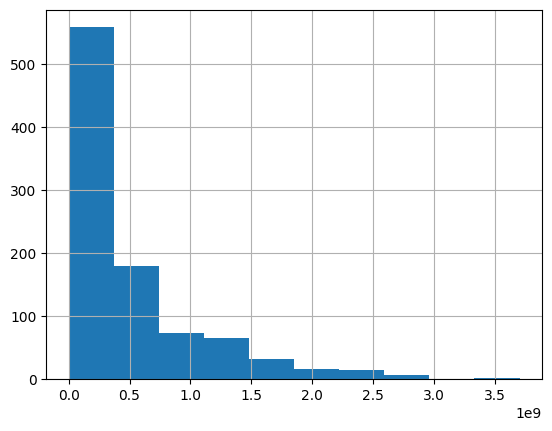

In [ ]:
#Visualização de Dados - histograma
import matplotlib.pyplot as plt
df['streams'].hist()
plt.show()

In [ ]:
#Streams por artista e Ano de Lançamento
pivot_table_artist_year = pd.pivot_table(df, values='streams', index=['artist_s__name', 'released_year'], aggfunc='sum')
print(pivot_table_artist_year)

                                                                     streams
artist_s__name                                     released_year            
 g i dle                                           2022            170709584
                                                   2023             96273746
21 savage gunna                                    2022             60680939
24kgoldn iann dior                                 2020           1699402402
50 cent                                            2002           1202722675
a ap rocky metro boomin roisee                     2023             94186466
a ha                                               1984           1479115056
abhijay sharma riar saab                           2022             71007139
adassa mauro castillo stephanie beatriz encanto... 2021            432719968
adele                                              2010           1472799873
                                                   2011           1163620694

###Média de características musicais por categoria de BPM


In [ ]:
#média de danceability, valence e energy para BPM

pivot_table_bpm = pd.pivot_table(df, values=['danceability__', 'valence__', 'energy__'], index=['bpm_categorizada'], aggfunc='mean')
print(pivot_table_bpm)

                  danceability__   energy__  valence__
bpm_categorizada                                      
Alto                   60.831224  63.324895  50.987342
Baixo                  69.018284  64.569620  51.531646


###Presença em Playlists por Mês de Lançamento


In [ ]:
#Quantas vezes faixas lançadas em determinados meses aparecem em playlists do Spotify, Apple e Deezer.
pivot_table_playlists = pd.pivot_table(df, values=['in_spotify_charts', 'in_apple_playlists', 'in_deezer_playlists'],
                                       index=['release_year_month_concat'], aggfunc='sum')
print(pivot_table_playlists)


                           in_apple_playlists  in_deezer_playlists  in_spotify_charts
release_year_month_concat                                                            
1942-01                                    73                  123                  0
1946-11                                   140                  251                  0
1950-01                                   126                  406                  0
1952-01                                   108                   73                  0
1957-01                                   197                  169                  0
1958-01                                   400                  416                  0
1959-01                                    65                   41                  0
1959-11                                    88                  277                  0
1963-10                                   182                  160                  0
1963-11                                   235         

###Análise da Influência de Features Acústicas na Presença em Charts

In [ ]:
#Verificar se há tendências claras sobre a influência de características acústicas (como acousticness, instrumentalness) na presença em charts.

pivot_table_acoustic_features = pd.pivot_table(df, values=['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts'],
                                               index=['acousticness_quartil', 'instrumentalness_quartil'], aggfunc='mean')
print(pivot_table_acoustic_features)



                                               in_apple_charts  in_deezer_charts  in_spotify_charts
acousticness_quartil instrumentalness_quartil                                                      
1                    1                               63.222222          3.148148          14.629630
                     2                               55.239437          1.985915           9.211268
                     3                               56.684211          3.000000          11.614035
                     4                               53.200000          2.490909          12.018182
2                    1                               51.807018          2.631579          13.982456
                     2                               49.438596          2.701754          13.298246
                     3                               53.454545          2.924242          13.257576
                     4                               53.789474          2.315789          14.964912


##Top 10

In [ ]:
#add nova coluna -> streams_in_million
df['streams_in_millions'] = df['streams'].apply(lambda x: x / 1000000).round(2)
df.head()

,track_id,track_name,artist_s__name,artist_count,released_year,released_month,released_day,release_date_concat,release_year_month_concat,total_playlists,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,bpm,danceability__,valence__,energy__,acousticness__,instrumentalness__,liveness__,speechiness__,bpm_quartil,bpm_categorizada,danceability_quartil,danceability_categorizada,valence_quartil,valence_categorizada,energy_quartil,energy_categorizada,acousticness_quartil,acousticness_categorizada,instrumentalness_quartil,instrumentalness_categorizada,liveness_quartil,liveness_categorizada,speechiness_quartil,speechiness_categorizada,streams_in_millions
0,6909746,white christmas,bing crosby john scott trotter his orchestra k...,3,1942,1,1,1942-01-01,1942-01,12136,11940,0,395591396,73,79,123,0,96,23,19,25,91,0,40,3,1,Baixo,1,Baixo,1,Baixo,1,Baixo,4,Alto,3,Baixo,4,Alto,1,Baixo,395.59
1,4002890,a holly jolly christmas single version,burl ives,1,1952,1,1,1952-01-01,1952-01,8111,7930,0,395591396,108,120,73,0,140,67,81,36,64,0,15,3,3,Baixo,2,Baixo,4,Alto,1,Baixo,4,Alto,1,Baixo,3,Baixo,1,Baixo,395.59
2,6372609,jingle bell rock,bobby helms,1,1957,1,1,1957-01-01,1957-01,10595,10326,0,741301563,165,99,104,0,119,74,78,37,84,0,6,3,2,Baixo,3,Baixo,4,Alto,1,Baixo,4,Alto,1,Baixo,1,Baixo,1,Baixo,741.30
3,8167749,deck the hall remastered 1999,nat king cole,1,1959,1,1,1959-01-01,1959-01,3405,3299,0,127027715,65,39,41,0,107,69,96,36,81,0,8,4,2,Baixo,2,Baixo,4,Alto,1,Baixo,4,Alto,4,Alto,1,Baixo,1,Baixo,127.03
4,5350503,it s the most wonderful time of the year,andy williams,1,1963,10,14,1963-10-14,1963-10,9221,8879,0,663832097,182,107,160,0,202,24,76,60,77,0,12,4,4,Alto,1,Baixo,4,Alto,2,Baixo,4,Alto,3,Baixo,3,Baixo,1,Baixo,663.83


In [ ]:
# top 10 - músicas mais populares em termos de streams
top_10_streams = df.filter(items = ['track_name','artist_s__name' ,'streams_in_millions'], axis = 1)
# sorting the values by stream in decsending order
top_10_streams = top_10_streams.sort_values(by = 'streams_in_millions',ascending = False).head(10)
top_10_streams

,track_name,artist_s__name,streams_in_millions
513,blinding lights,the weeknd,3703.90
500,shape of you,ed sheeran,3562.54
71,someone you loved,lewis capaldi,2887.24
506,dance monkey,tones and i,2864.79
292,sunflower spider man into the spider verse,post malone swae lee,2808.10
279,one dance,drake wizkid kyla,2713.92
314,stay with justin bieber,justin bieber the kid laroi,2665.34
501,believer,imagine dragons,2594.04
55,closer,the chainsmokers halsey,2591.22
727,starboy,the weeknd daft punk,2565.53


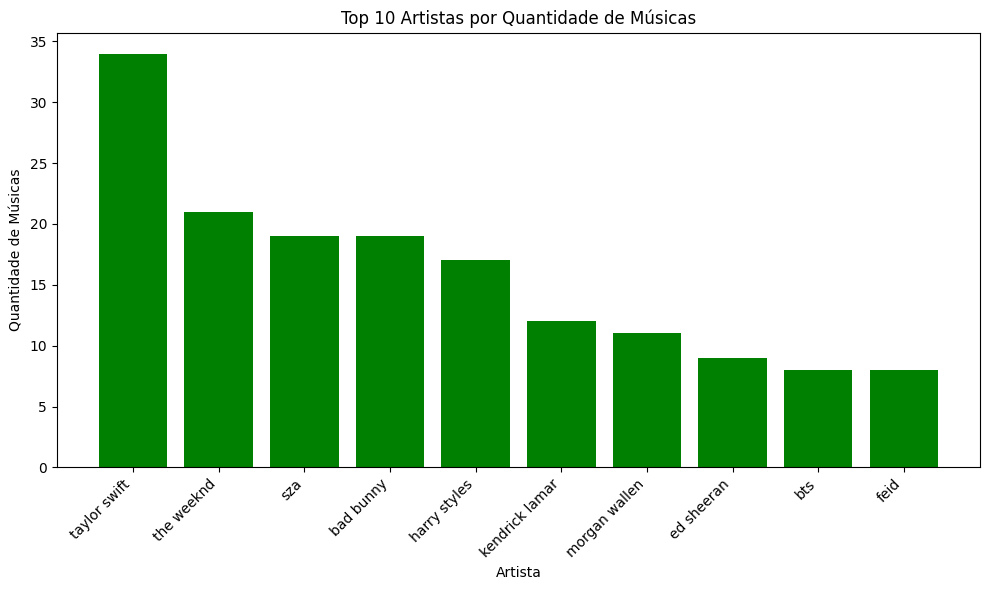

In [9]:
#top 10 artistas por quantidade de músicas

# Contando a quantidade de músicas por artista
artist_song_count = df['artist_s__name'].value_counts()

artist_song_count_df = artist_song_count.reset_index()
artist_song_count_df.columns = ['artist_s__name', 'track_count']

# Ordenando os valores pelo número de músicas de forma decrescente e selecionando o top 10
top_10_artists_by_song_count = artist_song_count_df.sort_values(by='track_count', ascending=False).head(10)

top_10_artists_by_song_count

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_10_artists_by_song_count['artist_s__name'], top_10_artists_by_song_count['track_count'], color='green')
plt.xlabel('Artista')
plt.ylabel('Quantidade de Músicas')
plt.title('Top 10 Artistas por Quantidade de Músicas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


###Músicas por artista solo

In [ ]:
#contagem de músicas por artista
artist_song_count = df['artist_s__name'].value_counts()

# Categorizando os artistas
one_song_artists = artist_song_count[artist_song_count == 1].count()
two_to_ten_songs_artists = artist_song_count[(artist_song_count >= 2) & (artist_song_count <= 10)].count()
more_than_ten_songs_artists = artist_song_count[artist_song_count > 10].count()

print(f"Artistas com apenas 1 música: {one_song_artists}")
print(f"Artistas com entre 2 e 10 músicas: {two_to_ten_songs_artists}")
print(f"Artistas com mais de 10 músicas: {more_than_ten_songs_artists}")


Artistas com apenas 1 música: 542
Artistas com entre 2 e 10 músicas: 95
Artistas com mais de 10 músicas: 7


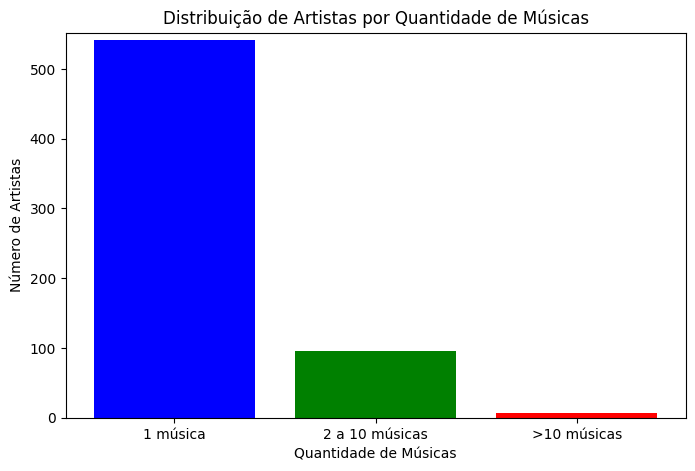

In [ ]:
# Criando dados para o gráfico
import matplotlib.pyplot as plt

categories = ['1 música', '2 a 10 músicas', '>10 músicas']
values = [one_song_artists, two_to_ten_songs_artists, more_than_ten_songs_artists]

#gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(categories, values, color=['blue', 'green', 'red'])
plt.title('Distribuição de Artistas por Quantidade de Músicas')
plt.xlabel('Quantidade de Músicas')
plt.ylabel('Número de Artistas')
plt.ylim(0, max(values) + 10)  # Ajustando o limite do eixo y para melhor visualização

plt.show()

#Regressão Linear

Total Presença em Playlists vs Streams

Coeficiente de correlação:PearsonRResult(statistic=0.7832450109547366, pvalue=1.8025640667977528e-197)


Text(0, 0.5, 'Streams (Bilhão)')

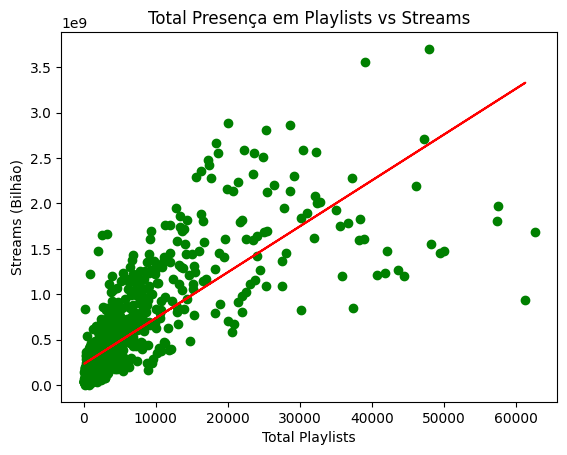

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
import matplotlib.pyplot as plt


#Gráfico de Dispersão e Cálculo do índice de correlação

X=df['total_playlists'].values
Y=df['streams'].values

r=pearsonr(X,Y)
print (f'Coeficiente de correlação:{r}')

#Separe dados de treino e teste
#Utilize 70% dos dados para treino e o restante (30%) para teste
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

#Precisa redimensionar os dados para fazer a regressão linear
x_train=x_train.reshape(-1,1)
y_train=y_train.reshape(-1,1)
x_test=x_test.reshape(-1,1)
y_test=y_test.reshape(-1,1)

#Treine o modelo
reg=LinearRegression()
reg.fit(x_train,y_train)
pred=reg.predict(x_test)

plt.scatter(X,Y,color="green")
plt.plot(x_test, pred, color="red")
plt.title ("Total Presença em Playlists vs Streams")
plt.xlabel("Total Playlists")
plt.ylabel("Streams (Bilhão)")


Coeficiente r2:0.5813599349270417


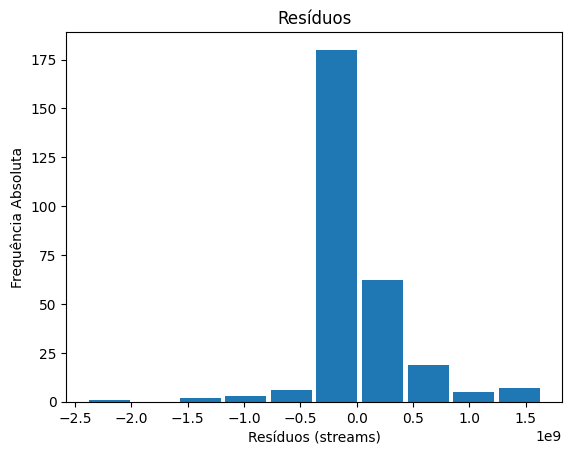

In [ ]:
#Representação do modelo
r_squared=r2_score(y_test, pred)
print(f'Coeficiente r2:{r_squared}')

residual = y_test - pred

plt.title('Resíduos')
plt.xlabel('Resíduos (streams)')
plt.ylabel('Frequência Absoluta')
plt.hist(residual, rwidth=0.9)
plt.show()

BPM vs Streams - Gráfico de Dispersão e Cálculo do índice de correlação


Coeficiente de correlação:PearsonRResult(statistic=-0.0023050669108387583, pvalue=0.9434944038809814)


Text(0, 0.5, 'Streams')

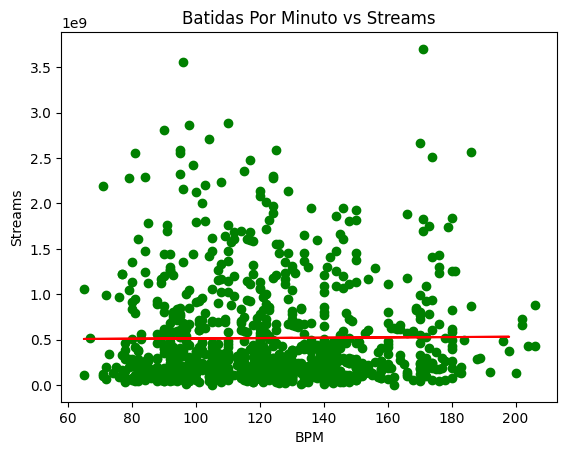

In [ ]:
#Gráfico de Dispersão e Cálculo do índice de correlação

X=df['bpm'].values
Y=df['streams'].values

r=pearsonr(X,Y)
print (f'Coeficiente de correlação:{r}')

#Separe dados de treino e teste
#Utilize 70% dos dados para treino e o restante (30%) para teste
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

#Precisa redimensionar os dados para fazer a regressão linear
x_train=x_train.reshape(-1,1)
y_train=y_train.reshape(-1,1)
x_test=x_test.reshape(-1,1)
y_test=y_test.reshape(-1,1)

#Treine o modelo
reg=LinearRegression()
reg.fit(x_train,y_train)
pred=reg.predict(x_test)

plt.scatter(X,Y,color="green")
plt.plot(x_test, pred, color="red")
plt.title ("Batidas Por Minuto vs Streams")
plt.xlabel("BPM")
plt.ylabel("Streams")


Coeficiente r2:0.5813599349270417


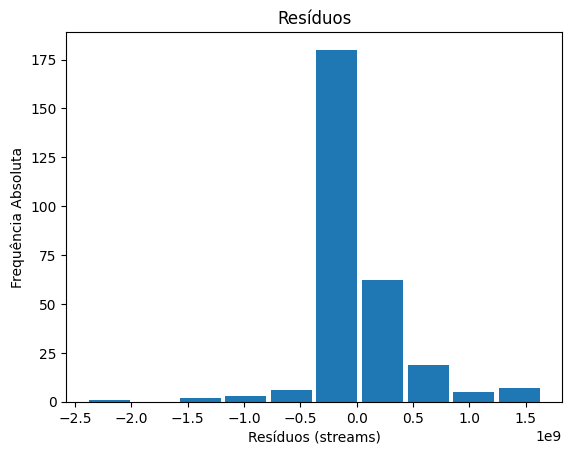

In [ ]:
#Verifique a representação do modelo
r_squared=r2_score(y_test, pred)
print(f'Coeficiente r2:{r_squared}')

residual = y_test - pred

plt.title('Resíduos')
plt.xlabel('Resíduos (streams)')
plt.ylabel('Frequência Absoluta')
plt.hist(residual, rwidth=0.9)
plt.show()

Ano de Lançamento vs Streams

Coeficiente de correlação:PearsonRResult(statistic=-0.24592672564565882, pvalue=1.5877757504943375e-14)


Text(0, 0.5, 'Streams (Bilhão)')

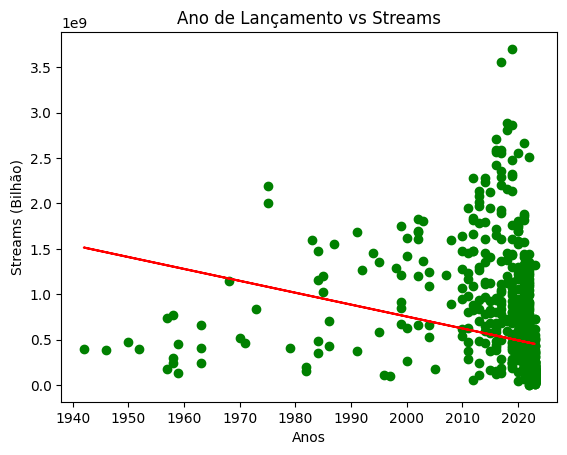

In [ ]:
#Gráfico de Dispersão e Cálculo do índice de correlação

X=df['released_year'].values
Y=df['streams'].values


r=pearsonr(X,Y)
print (f'Coeficiente de correlação:{r}')

#Separe dados de treino e teste
#Utilize 70% dos dados para treino e o restante (30%) para teste
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

#Precisa redimensionar os dados para fazer a regressão linear
x_train=x_train.reshape(-1,1)
y_train=y_train.reshape(-1,1)
x_test=x_test.reshape(-1,1)
y_test=y_test.reshape(-1,1)

#Treine o modelo
reg=LinearRegression()
reg.fit(x_train,y_train)
pred=reg.predict(x_test)

plt.scatter(X,Y,color="green")
plt.plot(x_test, pred, color="red")
plt.title ("Ano de Lançamento vs Streams")
plt.xlabel("Anos")
plt.ylabel("Streams (Bilhão)")


Coeficiente r2:0.07135300877516448


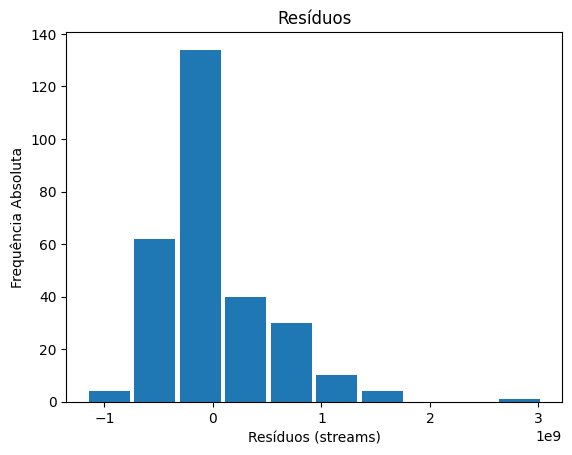

In [ ]:
#Verifique a representação do modelo
r_squared=r2_score(y_test, pred)
print(f'Coeficiente r2:{r_squared}')

residual = y_test - pred

plt.title('Resíduos')
plt.xlabel('Resíduos (streams)')
plt.ylabel('Frequência Absoluta')
plt.hist(residual, rwidth=0.9)
plt.show()

Batidas Por Minuto (Alto) vs Streams

Coeficiente de correlação:PearsonRResult(statistic=0.14687094827972005, pvalue=0.023736223542605985)


Text(0, 0.5, 'Streams')

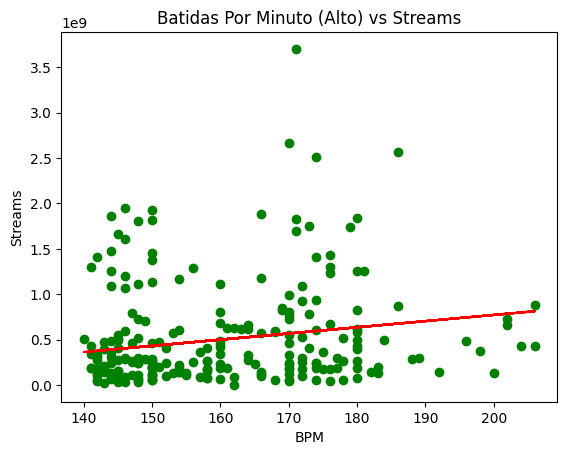

In [ ]:
#Gráfico de Dispersão e Cálculo do índice de correlação

df=df[df['bpm_categorizada']=='Alto']

X=df['bpm'].values
Y=df['streams'].values

r=pearsonr(X,Y)
print (f'Coeficiente de correlação:{r}')

#Separe dados de treino e teste
#Utilize 70% dos dados para treino e o restante (30%) para teste
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

#Precisa redimensionar os dados para fazer a regressão linear
x_train=x_train.reshape(-1,1)
y_train=y_train.reshape(-1,1)
x_test=x_test.reshape(-1,1)
y_test=y_test.reshape(-1,1)

#Treine o modelo
reg=LinearRegression()
reg.fit(x_train,y_train)
pred=reg.predict(x_test)

plt.scatter(X,Y,color="green")
plt.plot(x_test, pred, color="red")
plt.title ("Batidas Por Minuto (Alto) vs Streams")
plt.xlabel("BPM")
plt.ylabel("Streams")

###Músicas com BPM (Beats Per Minute) mais altos fazem mais sucesso em termos de streams no Spotify

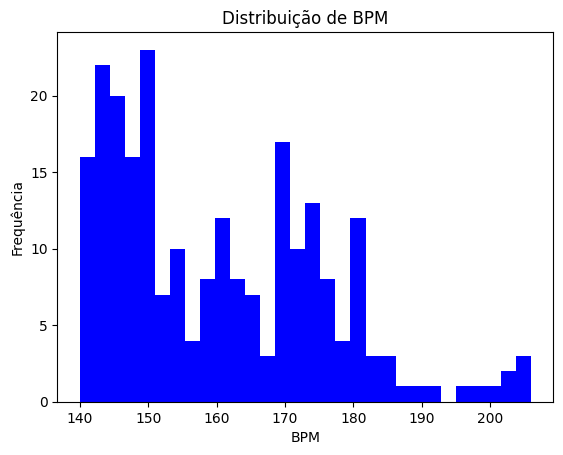

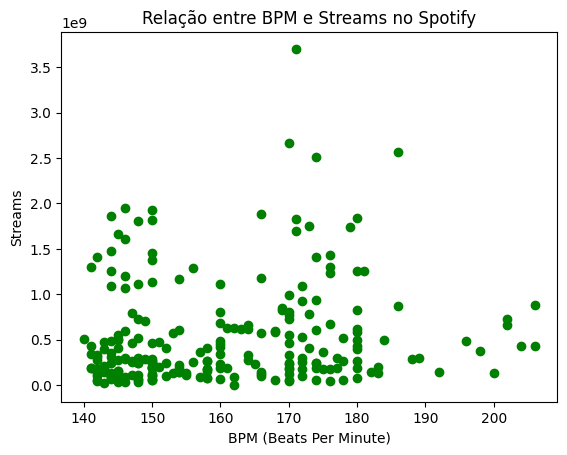

Coeficiente de correlação: 0.14687094827972005


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr

# Verificando a distribuição de BPM
plt.hist(df['bpm'], bins=30, color='blue')
plt.title('Distribuição de BPM')
plt.xlabel('BPM')
plt.ylabel('Frequência')
plt.show()

# Convertendo para valores adequados para regressão linear
X = df['bpm'].values.reshape(-1, 1)
Y = df['streams'].values

# Plotando o gráfico de dispersão
plt.scatter(X, Y, color='green')
plt.title('Relação entre BPM e Streams no Spotify')
plt.xlabel('BPM (Beats Per Minute)')
plt.ylabel('Streams')
plt.show()

# Calculando a correlação
r = pearsonr(df['bpm'], df['streams'])
print(f'Coeficiente de correlação: {r[0]}')


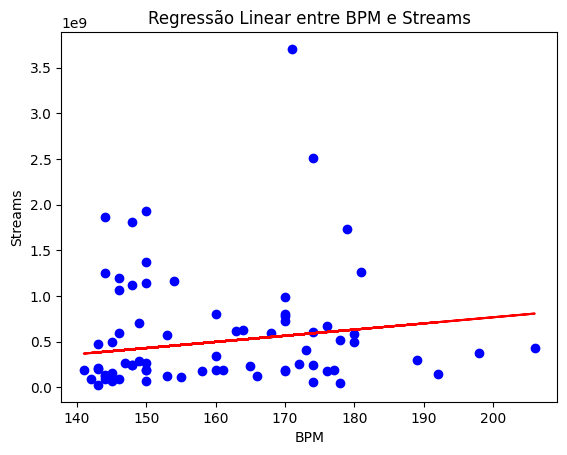

In [ ]:
#Regressão
# Divisão dos dados em conjuntos de treino e teste
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Treinando o modelo de regressão linear
reg = LinearRegression()
reg.fit(x_train, y_train)

# Prevendo os streams com base em BPM
pred = reg.predict(x_test)

# Plotando os resultados da regressão sobre os dados de teste
plt.scatter(x_test, y_test, color='blue')  # Dados reais
plt.plot(x_test, pred, color='red')  # Linha de regressão
plt.title('Regressão Linear entre BPM e Streams')
plt.xlabel('BPM')
plt.ylabel('Streams')
plt.show()


#Lançamento de músicas por ano

In [ ]:
Released_year = df.released_year.value_counts().reset_index()
Released_year

,released_year,count
0,2022,95
1,2023,43
2,2021,36
3,2019,9
4,2020,6
5,2016,6
6,2012,5
7,2011,4
8,2015,4
9,2017,3


#Distribuição de streams em diferentes meses

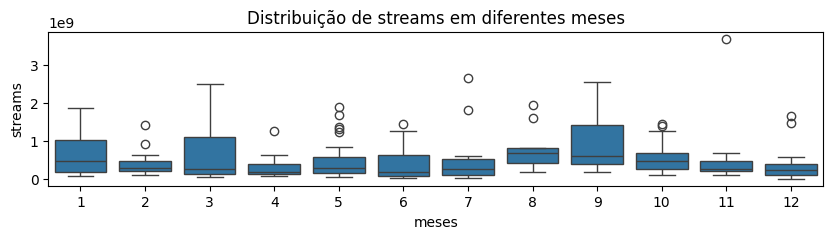

In [ ]:
plt.figure(figsize = (10,2))
sns.boxplot(x='released_month', y='streams', data=df)
plt.title('Distribuição de streams em diferentes meses')
plt.xlabel('meses')
plt.ylabel('streams')
plt.show();

#Música com maior hora de stream

In [ ]:
histream = df[['track_name', 'artist_s__name','released_year', 'streams']].\
sort_values(by = 'streams', ascending = False)

histream.head(1)

,track_name,artist_s__name,released_year,streams
513,blinding lights,the weeknd,2019,3703895074


#Música mais transmitida

In [ ]:
most_streamed_songs = df[['artist_s__name','track_name','streams']].nlargest(10,'streams')
display(most_streamed_songs)

,artist_s__name,track_name,streams
513,the weeknd,blinding lights,3703895074
500,ed sheeran,shape of you,3562543890
71,lewis capaldi,someone you loved,2887241814
506,tones and i,dance monkey,2864791672
292,post malone swae lee,sunflower spider man into the spider verse,2808096550
279,drake wizkid kyla,one dance,2713922350
314,justin bieber the kid laroi,stay with justin bieber,2665343922
501,imagine dragons,believer,2594040133
55,the chainsmokers halsey,closer,2591224264
727,the weeknd daft punk,starboy,2565529693


#Artista mais transmitido

In [ ]:
most_streamed_artists = df.groupby('artist_s__name')[['streams']].sum().nlargest(10,'streams')
display(most_streamed_artists)

,streams
artist_s__name,
the weeknd,14054897067
taylor swift,14053658300
ed sheeran,13908947204
harry styles,11608645649
bad bunny,9997799607
olivia rodrigo,7442148916
eminem,6183805596
bruno mars,5846920599
arctic monkeys,5569806731


#Quantas músicas cada artista tem na lista de músicas mais transmitidas

In [ ]:
total_appearances = len(df)
artist_appearances_count = df['artist_s__name'].value_counts().reset_index()
artist_appearances_count.columns = ['artist_s__name', 'count']
artist_appearances_count['percentage_of_total'] = (artist_appearances_count['count'] / total_appearances) * 100
most_appeared_artists_percentage = artist_appearances_count.nlargest(10, 'percentage_of_total')
display(most_appeared_artists_percentage)

,artist_s__name,count,percentage_of_total
0,taylor swift,34,3.586498
1,the weeknd,21,2.215190
2,sza,19,2.004219
3,bad bunny,19,2.004219
4,harry styles,17,1.793249
5,kendrick lamar,12,1.265823
6,morgan wallen,11,1.160338
7,ed sheeran,9,0.949367
8,drake 21 savage,8,0.843882
9,bts,8,0.843882


#Hipótese 2
As músicas mais populares no ranking do Spotify também possuem um comportamento semelhante em outras plataformas, como a Deezer.

Charts é uma variável ordinal, possui uma distribuição não normal.


A correlação de Spearman é: 0.5210
O valor-p é: 0.0000


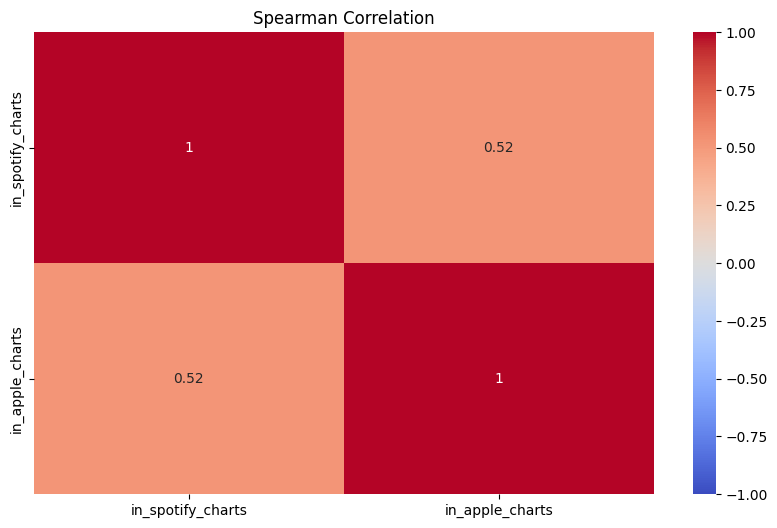

In [ ]:
# Importe as bibliotecas necessárias
import pandas as pd
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt

# Calcule a correlação
correlation, p_value = spearmanr(df["in_spotify_charts"], df["in_apple_charts"])
print(f"A correlação de Spearman é: {correlation:.4f}")
print(f"O valor-p é: {p_value:.4f}")

# Visualize a correlação
def display_correlation(df):
    r = df[["in_spotify_charts", "in_apple_charts"]].corr(method="spearman")
    plt.figure(figsize=(10, 6))
    heatmap = sns.heatmap(r, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
    plt.title("Spearman Correlation")
    plt.show()

# Chame a função para exibir o gráfico
display_correlation(df)


A correlação de Spearman é: 0.5913
O valor-p é: 0.0000


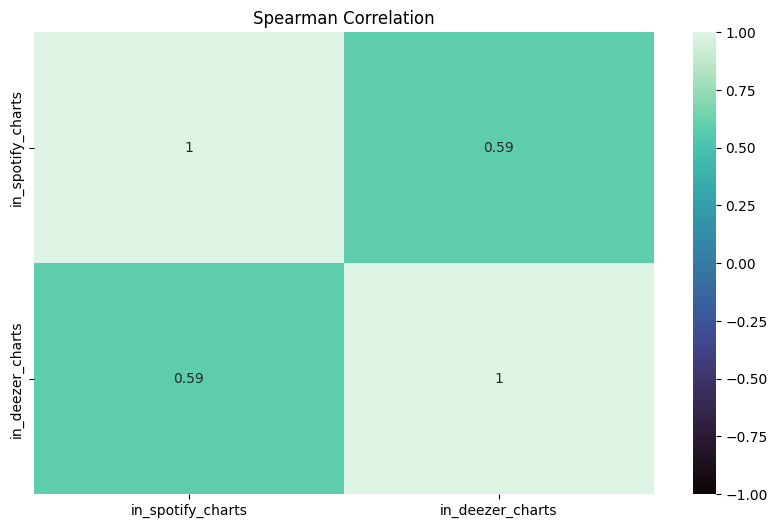

In [ ]:
# Calcule a correlação
correlation, p_value = spearmanr(df["in_spotify_charts"], df["in_deezer_charts"])
print(f"A correlação de Spearman é: {correlation:.4f}")
print(f"O valor-p é: {p_value:.4f}")

# Visualize a correlação
def display_correlation(df):
    r = df[["in_spotify_charts", "in_deezer_charts"]].corr(method="spearman")
    plt.figure(figsize=(10, 6))
    heatmap = sns.heatmap(r, vmin=-1, vmax=1, annot=True, cmap='mako')
    plt.title("Spearman Correlation")
    plt.show()

# Chame a função para exibir o gráfico
display_correlation(df)


#Hipótese 3

A presença de uma música em um maior número de playlists está correlacionada com um maior número de streams.

#Hipótese 4

Artistas com um maior número de músicas no Spotify têm mais streams.

In [ ]:
# Contagem do número de músicas por artista
contagem_musicas_por_artista = df['artist_s__name'].value_counts()

# Seleciona os top 10 artistas com base no número de músicas
top_10_artistas = contagem_musicas_por_artista.head(10)

# Calcule a porcentagem de músicas por artista em relação ao total de músicas
porcentagem_musicas_por_artista = (top_10_artistas / len(df)) * 100

# Exiba a porcentagem de músicas para os top 10 artistas
print(porcentagem_musicas_por_artista)



artist_s__name
taylor swift       3.586498
the weeknd         2.215190
sza                2.004219
bad bunny          2.004219
harry styles       1.793249
kendrick lamar     1.265823
morgan wallen      1.160338
ed sheeran         0.949367
drake 21 savage    0.843882
bts                0.843882
Name: count, dtype: float64


<ipython-input-32-8ae54f260e05>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(porcentagem_musicas_por_artista.index, rotation=45, ha='right')


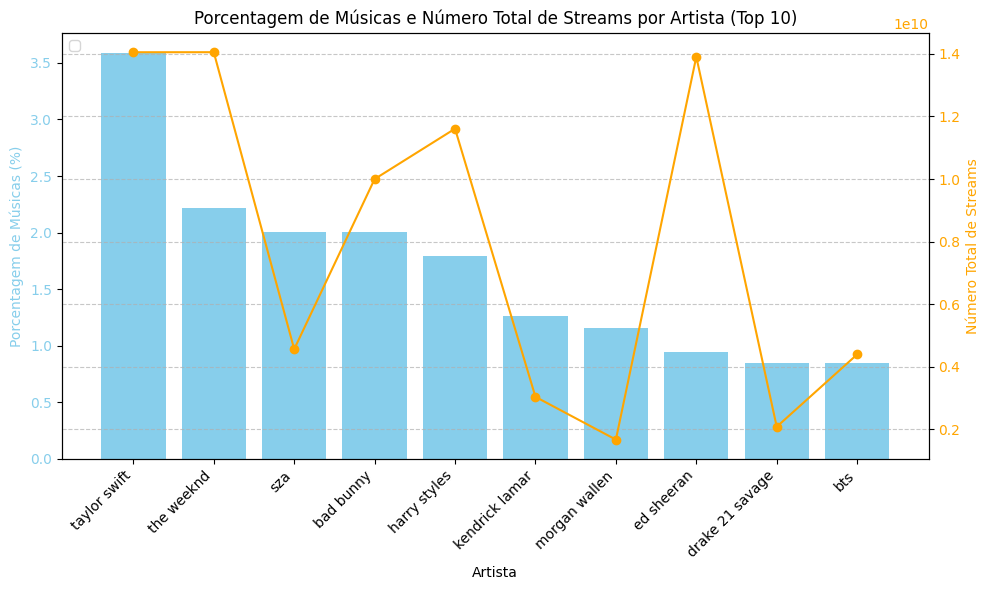

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponha que você tenha um DataFrame chamado 'df' contendo as variáveis do seu banco de dados
# Se não, substitua 'df' pelo nome do seu DataFrame

# Contagem do número de músicas por artista
contagem_musicas_por_artista = df['artist_s__name'].value_counts()

# Seleciona os top 10 artistas com base no número de músicas
top_10_artistas = contagem_musicas_por_artista.head(10)

# Calcule a porcentagem de músicas por artista em relação ao total de músicas
porcentagem_musicas_por_artista = (top_10_artistas / len(df)) * 100

# Calcula o número total de streams para os top 10 artistas
streams_por_artista = df.groupby('artist_s__name')['streams'].sum()
streams_top_10_artistas = streams_por_artista[top_10_artistas.index]

# Crie o gráfico de barras
fig, ax1 = plt.subplots(figsize=(10, 6))

# Barra para a porcentagem de músicas
ax1.bar(porcentagem_musicas_por_artista.index, porcentagem_musicas_por_artista, color='skyblue')
ax1.set_xlabel('Artista')
ax1.set_ylabel('Porcentagem de Músicas (%)', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xticklabels(porcentagem_musicas_por_artista.index, rotation=45, ha='right')

# Segundo eixo y para o número total de streams
ax2 = ax1.twinx()
ax2.plot(porcentagem_musicas_por_artista.index, streams_top_10_artistas, color='orange', marker='o', linestyle='-')
ax2.set_ylabel('Número Total de Streams', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Adiciona legenda
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# Título e exibição do gráfico
plt.title('Porcentagem de Músicas e Número Total de Streams por Artista (Top 10)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


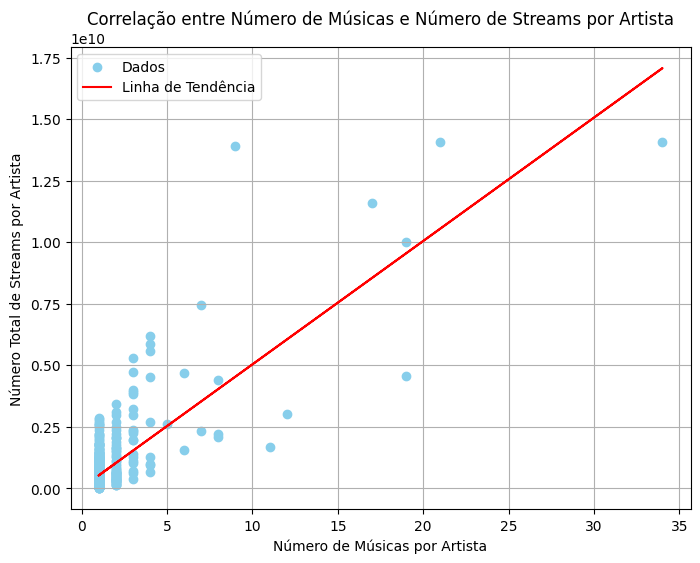

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Suponha que você tenha um DataFrame chamado 'df' contendo as variáveis do seu banco de dados
# Se não, substitua 'df' pelo nome do seu DataFrame

# Agrupe os dados por artista e calcule o número total de músicas e de streams
dados_por_artista = df.groupby('artist_s__name').agg({'track_name': 'count', 'streams': 'sum'})

# Extraia as variáveis para o gráfico de dispersão
numero_musicas_por_artista = dados_por_artista['track_name']
numero_streams_por_artista = dados_por_artista['streams']

# Ajuste uma linha de tendência (regressão linear)
coeficiente = np.polyfit(numero_musicas_por_artista, numero_streams_por_artista, 1)
polinomio = np.poly1d(coeficiente)

# Crie o gráfico de dispersão com a linha de tendência
plt.figure(figsize=(8, 6))
plt.scatter(numero_musicas_por_artista, numero_streams_por_artista, color='skyblue', label='Dados')
plt.plot(numero_musicas_por_artista, polinomio(numero_musicas_por_artista), color='red', label='Linha de Tendência')
plt.title('Correlação entre Número de Músicas e Número de Streams por Artista')
plt.xlabel('Número de Músicas por Artista')
plt.ylabel('Número Total de Streams por Artista')
plt.legend()
plt.grid(True)
plt.show()


#Hipótese 5

As características da música influenciam o sucesso em termos de número de streams no Spotify.

              bpm  danceability__   valence__    energy__  acousticness__  instrumentalness__  liveness__  speechiness__       streams
count  948.000000      948.000000  948.000000  948.000000      948.000000          948.000000  948.000000     948.000000  9.480000e+02
mean   122.473629       66.971519   51.395570   64.258439       27.160338            1.568565   18.168776      10.155063  5.143365e+08
std     28.047409       14.646710   23.513789   16.583591       26.024755            8.410065   13.705724       9.932731  5.677971e+08
min     65.000000       23.000000    4.000000    9.000000        0.000000            0.000000    3.000000       2.000000  2.762000e+03
25%     99.000000       57.000000   32.000000   53.000000        6.000000            0.000000   10.000000       4.000000  1.416362e+08
50%    120.500000       69.000000   51.000000   66.000000       18.000000            0.000000   12.000000       6.000000  2.891651e+08
75%    140.000000       78.000000   70.000000   77.0000

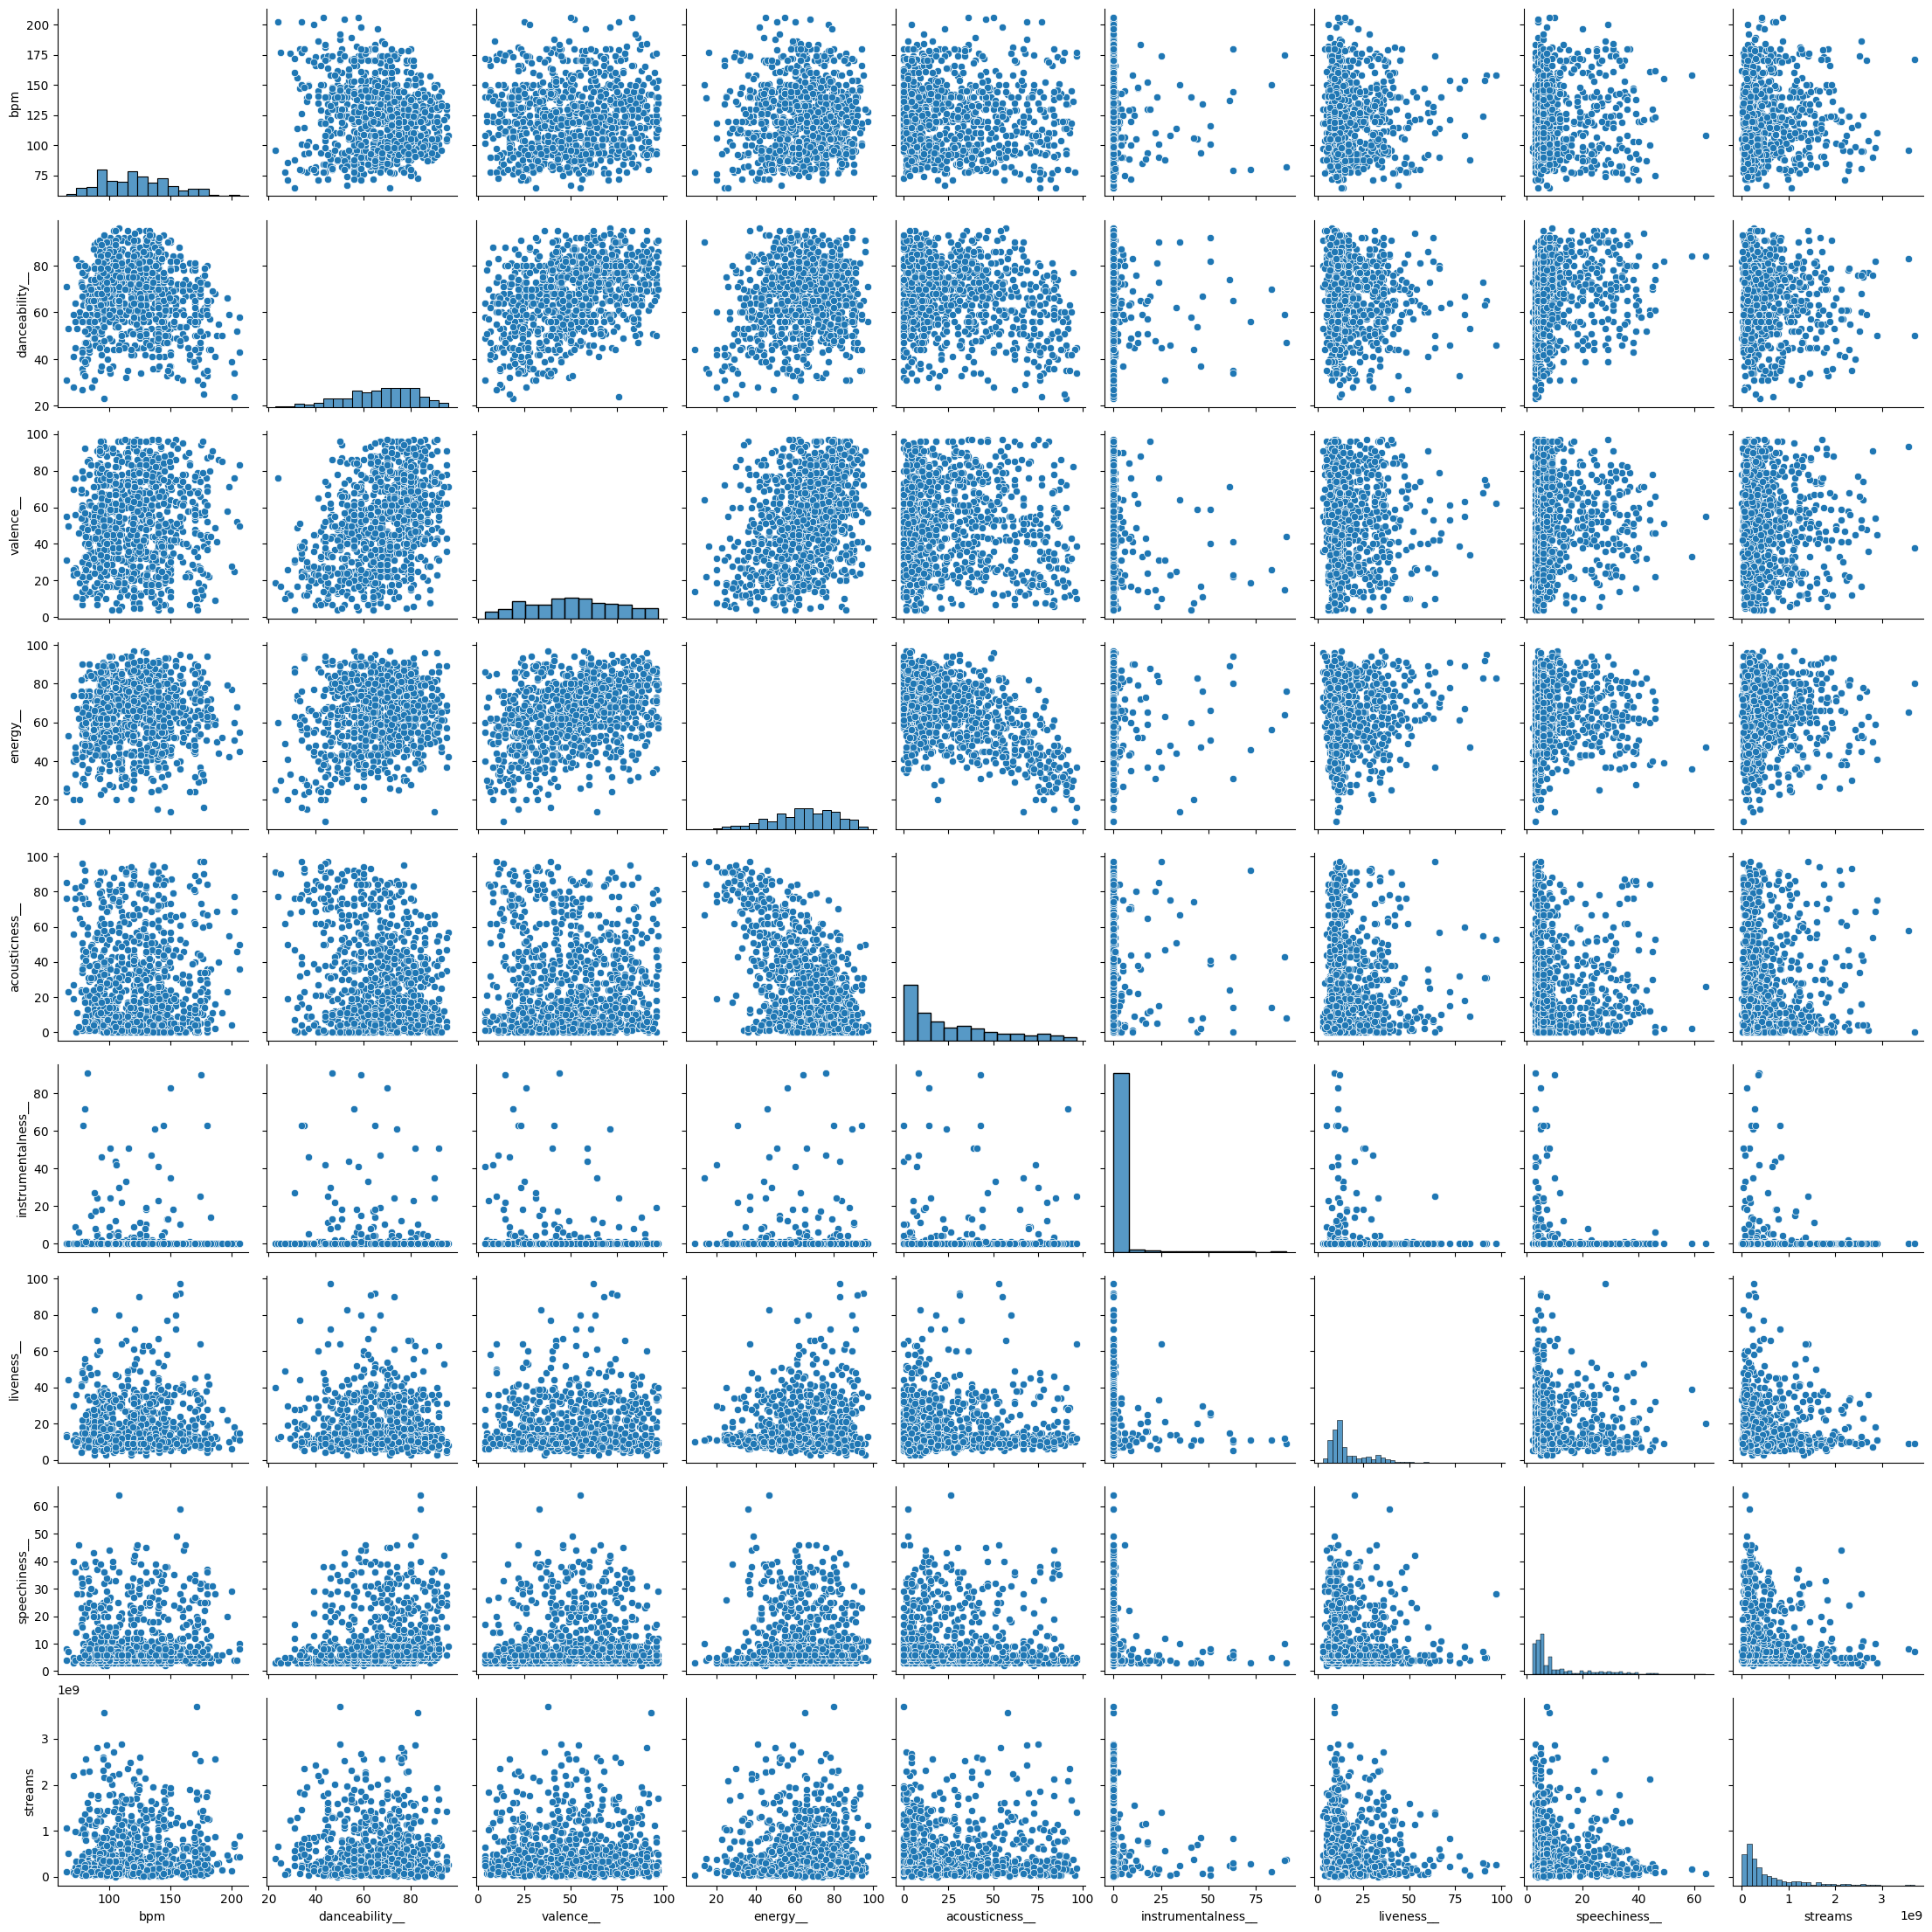

In [ ]:
# Análise descritiva das características da música e do número de streams
descricao = df[['bpm', 'danceability__', 'valence__', 'energy__', 'acousticness__',
                'instrumentalness__', 'liveness__', 'speechiness__', 'streams']].describe()
print(descricao)

# Visualização de dados
sns.pairplot(df[['bpm', 'danceability__', 'valence__', 'energy__', 'acousticness__',
                 'instrumentalness__', 'liveness__', 'speechiness__', 'streams']])
plt.show()


In [ ]:
from scipy.stats import pearsonr, spearmanr

# Teste de correlação de Pearson entre as características da música e o número de streams
for coluna in ['bpm', 'danceability__', 'valence__', 'energy__', 'acousticness__',
               'instrumentalness__', 'liveness__', 'speechiness__']:
    corr_coef, p_valor = pearsonr(df[coluna], df['streams'])
    print(f'Correlação de Pearson entre {coluna} e streams: {corr_coef}, Valor-p: {p_valor}')

Correlação de Pearson entre bpm e streams: -0.0023050669108387583, Valor-p: 0.9434944038809814
Correlação de Pearson entre danceability__ e streams: -0.10556527471495233, Valor-p: 0.0011334270948709399
Correlação de Pearson entre valence__ e streams: -0.04163248151141304, Valor-p: 0.20029488950969596
Correlação de Pearson entre energy__ e streams: -0.025926980141227813, Valor-p: 0.42524059981019324
Correlação de Pearson entre acousticness__ e streams: -0.004999516598725436, Valor-p: 0.877821820366046
Correlação de Pearson entre instrumentalness__ e streams: -0.04416555442915725, Valor-p: 0.17423881329440163
Correlação de Pearson entre liveness__ e streams: -0.049473459482902535, Valor-p: 0.12796125658808075
Correlação de Pearson entre speechiness__ e streams: -0.1127510835731849, Valor-p: 0.0005050234071865606
